# Bayesian Data Analysis - project work 2019

#### Ali Salloum & Oskari Lehtonen

### Content

#### I. Intro to our problem
#### II. Description of the data & Feature exploration
#### III. The pooled and hiearchial model
#### IV. Model Diagnostics
#### V. Comparing the two models
#### VI. Conclusion

In [18]:
import pandas as pd
import pystan
from daft_plots import daft_pooled, daft_unpooled, daft_partpooled, daft_hier

In [4]:
df = pd.read_csv("data/employee_data1.csv")

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.describe().T

In [ ]:
df["YearsAtCompany"].unique()

## Pooled model

In [ ]:
# skriivaa tähä kaavat

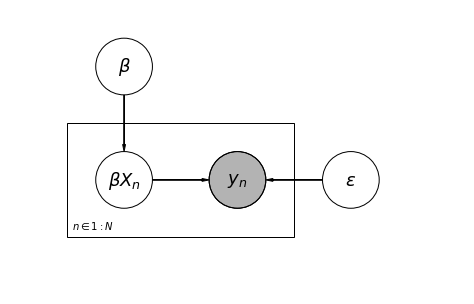

In [3]:
daft_pooled()

In [12]:
# tämä kun useampi predictor
model_pooled_stan_spec = """

    /* Spec for pooled regression linear model (robust) */

    data {                                 
        int<lower=0> N;                     // count of observations
        int<lower=0> K;                     // count of exog features
        matrix[N, K] X;                     // exog features
        vector[N] y;                        // endog feature
    }
    parameters {
        vector[K] beta;                     // exog coeffs
        real<lower=0> sigma;                // linear model error
    }
    transformed parameters {}
    model {  
        sigma ~ cauchy(0, 10);              // explicit prior for error (half-cauchy)
        y ~ student_t(1, X * beta, sigma);  // student-T likelihood
    }
    generated quantities {}
"""

In [21]:
# tämä kun yksi predictor
model_pooled_stan_spec = """

    /* Spec for pooled regression linear model (robust) */

    data {                                 
        int<lower=0> N;                     // count of observations
        vector[N] x;                        // exog features
        vector[N] y;                        // endog feature
    }
    parameters {
        real alpha;                          // intersect
        real beta;                          // exog slope
        real<lower=0> sigma;                // linear model error
    }
    transformed parameters {}
    model {  
        sigma ~ cauchy(0, 10);              // explicit prior for error (half-cauchy)
        y ~ normal(alpha + beta * x, sigma);
    }
    generated quantities {}
"""

In [16]:
ages = df.Age.values
monthly_salary = df.MonthlyIncome.values

In [22]:
pooled_data_dict = {'N': len(monthly_salary), 
                    'x': ages, 
                    'y': monthly_salary}

pooled_fit = pystan.stan(model_code = model_pooled_stan_spec, 
                         data=pooled_data_dict, 
                         iter=1000, 
                         chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_042d5ea0283d4a5597965a3421e1a49b NOW.


DistutilsPlatformError: Unable to find vcvarsall.bat